In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
# RUTA DE DATASET MS
DATASET_MS = '../dataset/ms/dataset-ms.xlsx'

In [3]:
# CARGA DE DATOS HOJA TRAIN
train_ds = pd.read_excel(DATASET_MS, sheet_name='train')

In [6]:
# DIVISION DE DATOS DE ENTRADA (X) Y SALIDA (y)
Predictors = ['ResistenciaEsperada', 'Cemento','Agua','AgregadoFino','AgregadoGrueso','TiempoCurado']
TargetVariable = ['Carga']

X=train_ds[Predictors].values
y=train_ds[TargetVariable].values

In [9]:
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [10]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [12]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [14]:
X[0]

array([-1.2202138 , -0.7478105 ,  0.50994904,  0.38295777,  0.3491838 ,
       -0.9887201 ])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(235, 6)
(235, 1)
(102, 6)
(102, 1)


In [23]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()

model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

model.add(Dense(1, kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error', optimizer='adam')
 
history = model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.9994 - val_loss: 0.9976
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9976 - val_loss: 0.9951
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9944 - val_loss: 0.9897
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9874 - val_loss: 0.9789
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9754 - val_loss: 0.9597
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9554 - val_loss: 0.9290
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9241 - val_loss: 0.8849
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8802 - val_loss: 0.8295
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 0.8240 - val_loss: 0.7636
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7600 - val_loss: 0.6925
Epoch 11/50
12/12 

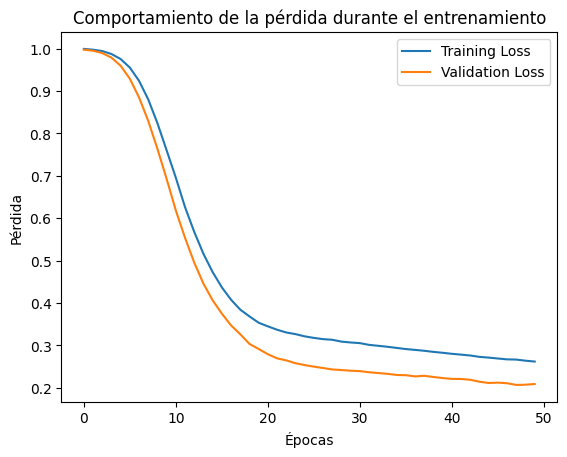

In [24]:
import matplotlib.pyplot as plt

# Mostrar el comportamiento de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [31]:
# Predicting the Test set results

y_pred = model.predict(X_train)

print(y_pred[0:5])

8/8 [==============================] - 0s 1ms/step
[[-1.1296682 ]
 [-1.1296682 ]
 [-0.02084975]
 [ 0.3894229 ]
 [ 0.42027232]]
